In [ ]:
import pandas as pd
import numpy as np
from keras.models import Sequential
from keras.layers import Dense
from keras.wrappers.scikit_learn import KerasClassifier
from keras.utils import np_utils
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import KFold
from sklearn.preprocessing import LabelEncoder
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import minmax_scale
from sklearn.model_selection import train_test_split
from keras.layers import Dropout
df = pd.read_csv(r"C:\Users\ahmad\Desktop\Postures.csv")


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 78096 entries, 0 to 78095
Data columns (total 38 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Class   78096 non-null  int64  
 1   User    78096 non-null  int64  
 2   X0      78096 non-null  float64
 3   Y0      78096 non-null  float64
 4   Z0      78096 non-null  float64
 5   X1      78096 non-null  float64
 6   Y1      78096 non-null  float64
 7   Z1      78096 non-null  float64
 8   X2      78096 non-null  float64
 9   Y2      78096 non-null  float64
 10  Z2      78096 non-null  float64
 11  X3      78096 non-null  object 
 12  Y3      78096 non-null  object 
 13  Z3      78096 non-null  object 
 14  X4      78096 non-null  object 
 15  Y4      78096 non-null  object 
 16  Z4      78096 non-null  object 
 17  X5      78096 non-null  object 
 18  Y5      78096 non-null  object 
 19  Z5      78096 non-null  object 
 20  X6      78096 non-null  object 
 21  Y6      78096 non-null  object 
 22

In [ ]:
df.isnull()

,Class,User,X0,Y0,Z0,X1,Y1,Z1,X2,Y2,...,Z8,X9,Y9,Z9,X10,Y10,Z10,X11,Y11,Z11
0,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
78091,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
78092,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
78093,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
78094,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False


In [ ]:
pd.set_option('display.max_columns', None)


In [ ]:
df.head()

,Class,User,X0,Y0,Z0,X1,Y1,Z1,X2,Y2,Z2,X3,Y3,Z3,X4,Y4,Z4,X5,Y5,Z5,X6,Y6,Z6,X7,Y7,Z7,X8,Y8,Z8,X9,Y9,Z9,X10,Y10,Z10,X11,Y11,Z11
0,0,0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,1,0,54.263880,71.466776,-64.807709,76.895635,42.462500,-72.780545,36.621229,81.680557,-52.919272,85.23226389,67.7492195,-73.68413004,59.1885757,10.67893641,-71.29778131,?,?,?,?,?,?,?,?,?,?,?,?,?,?,?,?,?,?,?,?,?
2,1,0,56.527558,72.266609,-61.935252,39.135978,82.538530,-49.596509,79.223743,43.254091,-69.982489,87.45087295,68.4008083,-70.70399093,61.58745155,11.77991903,-68.82741776,?,?,?,?,?,?,?,?,?,?,?,?,?,?,?,?,?,?,?,?,?
3,1,0,55.849928,72.469064,-62.562788,37.988804,82.631347,-50.606259,78.451526,43.567403,-70.658489,86.83538757,68.90792498,-71.13834414,61.68642719,11.79343989,-68.88931646,?,?,?,?,?,?,?,?,?,?,?,?,?,?,?,?,?,?,?,?,?
4,1,0,55.329647,71.707275,-63.688956,36.561863,81.868749,-52.752784,86.320630,68.214645,-72.228461,61.59615713,11.25064818,-68.95642523,77.38722541,42.71783348,-72.0151463,?,?,?,?,?,?,?,?,?,?,?,?,?,?,?,?,?,?,?,?,?


In [ ]:
pd.set_option('display.max_rows',None)

In [ ]:
#Converting valuesof columns to numeric
for val in list(df.columns.values):
    df[val] = pd.to_numeric(df[val], errors='coerce')

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 78096 entries, 0 to 78095
Data columns (total 38 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Class   78096 non-null  int64  
 1   User    78096 non-null  int64  
 2   X0      78096 non-null  float64
 3   Y0      78096 non-null  float64
 4   Z0      78096 non-null  float64
 5   X1      78096 non-null  float64
 6   Y1      78096 non-null  float64
 7   Z1      78096 non-null  float64
 8   X2      78096 non-null  float64
 9   Y2      78096 non-null  float64
 10  Z2      78096 non-null  float64
 11  X3      77406 non-null  float64
 12  Y3      77406 non-null  float64
 13  Z3      77406 non-null  float64
 14  X4      74976 non-null  float64
 15  Y4      74976 non-null  float64
 16  Z4      74976 non-null  float64
 17  X5      65073 non-null  float64
 18  Y5      65073 non-null  float64
 19  Z5      65073 non-null  float64
 20  X6      52248 non-null  float64
 21  Y6      52248 non-null  float64
 22

In [ ]:
#filling missing data
df=df.fillna(df.mean())

In [ ]:
df.head(20)

,Class,User,X0,Y0,Z0,X1,Y1,Z1,X2,Y2,Z2,X3,Y3,Z3,X4,Y4,Z4,X5,Y5,Z5,X6,Y6,Z6,X7,Y7,Z7,X8,Y8,Z8,X9,Y9,Z9,X10,Y10,Z10,X11,Y11,Z11
0,0,0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
1,1,0,54.263880,71.466776,-64.807709,76.895635,42.462500,-72.780545,36.621229,81.680557,-52.919272,85.232264,67.749219,-73.684130,59.188576,10.678936,-71.297781,47.042055,81.393686,-30.269905,45.676824,83.730711,-26.638728,44.462291,88.461072,-20.368196,48.207817,86.027768,-24.364044,54.746717,80.542435,-27.776883,53.755031,73.998602,-29.735972,-28.769563,25.151977,1.644271
2,1,0,56.527558,72.266609,-61.935252,39.135978,82.538530,-49.596509,79.223743,43.254091,-69.982489,87.450873,68.400808,-70.703991,61.587452,11.779919,-68.827418,47.042055,81.393686,-30.269905,45.676824,83.730711,-26.638728,44.462291,88.461072,-20.368196,48.207817,86.027768,-24.364044,54.746717,80.542435,-27.776883,53.755031,73.998602,-29.735972,-28.769563,25.151977,1.644271
3,1,0,55.849928,72.469064,-62.562788,37.988804,82.631347,-50.606259,78.451526,43.567403,-70.658489,86.835388,68.907925,-71.138344,61.686427,11.793440,-68.889316,47.042055,81.393686,-30.269905,45.676824,83.730711,-26.638728,44.462291,88.461072,-20.368196,48.207817,86.027768,-24.364044,54.746717,80.542435,-27.776883,53.755031,73.998602,-29.735972,-28.769563,25.151977,1.644271
4,1,0,55.329647,71.707275,-63.688956,36.561863,81.868749,-52.752784,86.320630,68.214645,-72.228461,61.596157,11.250648,-68.956425,77.387225,42.717833,-72.015146,47.042055,81.393686,-30.269905,45.676824,83.730711,-26.638728,44.462291,88.461072,-20.368196,48.207817,86.027768,-24.364044,54.746717,80.542435,-27.776883,53.755031,73.998602,-29.735972,-28.769563,25.151977,1.644271
5,1,0,55.142401,71.435607,-64.177303,36.175818,81.556874,-53.475747,76.986143,42.426849,-72.574743,86.368748,67.901260,-72.444650,61.275402,10.841109,-69.279906,47.042055,81.393686,-30.269905,45.676824,83.730711,-26.638728,44.462291,88.461072,-20.368196,48.207817,86.027768,-24.364044,54.746717,80.542435,-27.776883,53.755031,73.998602,-29.735972,-28.769563,25.151977,1.644271
6,1,0,55.581184,71.641201,-63.703137,34.850565,81.352041,-54.747444,77.078512,42.548245,-72.485489,86.851332,68.011836,-71.909938,61.856847,10.851973,-68.853752,47.042055,81.393686,-30.269905,45.676824,83.730711,-26.638728,44.462291,88.461072,-20.368196,48.207817,86.027768,-24.364044,54.746717,80.542435,-27.776883,53.755031,73.998602,-29.735972,-28.769563,25.151977,1.644271
7,1,0,34.522824,81.457318,-54.900995,55.827687,71.878788,-63.194368,86.902653,68.312680,-71.642074,61.829527,11.014978,-68.958796,76.954507,42.734639,-72.500619,47.042055,81.393686,-30.269905,45.676824,83.730711,-26.638728,44.462291,88.461072,-20.368196,48.207817,86.027768,-24.364044,54.746717,80.542435,-27.776883,53.755031,73.998602,-29.735972,-28.769563,25.151977,1.644271
8,1,0,61.621550,10.968187,-69.134037,32.678173,81.172874,-56.994362,86.732368,68.308089,-71.834003,76.829192,42.738228,-72.630146,48.405441,80.418433,-31.993130,47.042055,81.393686,-30.269905,45.676824,83.730711,-26.638728,44.462291,88.461072,-20.368196,48.207817,86.027768,-24.364044,54.746717,80.542435,-27.776883,53.755031,73.998602,-29.735972,-28.769563,25.151977,1.644271
9,1,0,61.401356,11.014961,-69.379418,32.527643,81.127660,-57.092473,86.421066,68.405649,-72.122161,77.146546,42.827962,-72.261479,55.609708,72.074196,-63.188466,47.042055,81.393686,-30.269905,45.676824,83.730711,-26.638728,44.462291,88.461072,-20.368196,48.207817,86.027768,-24.364044,54.746717,80.542435,-27.776883,53.755031,73.998602,-29.735972,-28.769563,25.151977,1.644271


In [ ]:
#keep only first class
dataframe=df
dataframe=dataframe.loc[dataframe['Class'] == 1]

dataframe=dataframe.drop(['Class'], axis=1)

In [ ]:
#normalize data
listValuesToNormalize=list(dataframe.columns.values)
listValuesToNormalize.remove('User')
listValuesToNormalize
dataframe[listValuesToNormalize] = minmax_scale(dataframe[listValuesToNormalize])


In [ ]:
dataframe.head()

,User,X0,Y0,Z0,X1,Y1,Z1,X2,Y2,Z2,X3,Y3,Z3,X4,Y4,Z4,X5,Y5,Z5,X6,Y6,Z6,X7,Y7,Z7,X8,Y8,Z8,X9,Y9,Z9,X10,Y10,Z10,X11,Y11,Z11
1,0,0.463067,0.673083,0.301926,0.554325,0.476545,0.363331,0.393129,0.661278,0.332768,0.804683,0.658371,0.299164,0.645000,0.432911,0.324104,0.740772,0.712249,0.490483,0.763601,0.565018,0.566009,0.608697,0.516298,0.459638,0.631988,0.455203,0.320392,0.708507,0.37022,0.295572,0.661801,0.317569,0.284395,0.0,0.0,0.0
2,0,0.472020,0.676255,0.315923,0.403797,0.664047,0.453686,0.563067,0.481644,0.254118,0.814929,0.660966,0.311927,0.657348,0.437299,0.335227,0.740772,0.712249,0.490483,0.763601,0.565018,0.566009,0.608697,0.516298,0.459638,0.631988,0.455203,0.320392,0.708507,0.37022,0.295572,0.661801,0.317569,0.284395,0.0,0.0,0.0
3,0,0.469340,0.677058,0.312865,0.399224,0.664482,0.449750,0.559987,0.483109,0.251003,0.812086,0.662985,0.310067,0.657858,0.437353,0.334948,0.740772,0.712249,0.490483,0.763601,0.565018,0.566009,0.608697,0.516298,0.459638,0.631988,0.455203,0.320392,0.708507,0.37022,0.295572,0.661801,0.317569,0.284395,0.0,0.0,0.0
4,0,0.467282,0.674037,0.307377,0.393535,0.660914,0.441385,0.591376,0.598328,0.243766,0.695527,0.433416,0.319411,0.738680,0.560595,0.320874,0.740772,0.712249,0.490483,0.763601,0.565018,0.566009,0.608697,0.516298,0.459638,0.631988,0.455203,0.320392,0.708507,0.37022,0.295572,0.661801,0.317569,0.284395,0.0,0.0,0.0
5,0,0.466542,0.672959,0.304998,0.391996,0.659454,0.438567,0.554141,0.477777,0.242170,0.809931,0.658977,0.304472,0.655742,0.433558,0.333190,0.740772,0.712249,0.490483,0.763601,0.565018,0.566009,0.608697,0.516298,0.459638,0.631988,0.455203,0.320392,0.708507,0.37022,0.295572,0.661801,0.317569,0.284395,0.0,0.0,0.0


In [ ]:
# split the dataset into input (X) and output (Y)
dataset = dataframe.values

X = dataset[:,1:].astype(float)
Y = dataset[:,0].astype(int)

In [ ]:
# converting integers to  one hot encoded
hot_encoded_y = np_utils.to_categorical(Y)

In [ ]:
seed = 1
np.random.seed(seed)
#splitting the data into 70 and 30%
X_train, X_test, y_train, y_test = train_test_split(X, hot_encoded_y, test_size=0.3, random_state=seed)


X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.25, random_state=seed)

print("the dataset has "+str(X.shape[0])+ "samples that are splitted in:")
print("- "+str(X_train.shape[0])+"samples (training set)" )
print("- "+str(X_val.shape[0])+"samples (validation set)")
print("- "+str(X_test.shape[0])+"samples (test set)")

the dataset has 16265samples that are splitted in:
- 8538samples (training set)
- 2847samples (validation set)
- 4880samples (test set)


In [ ]:
# creating model
model = Sequential()
model.add(Dense(12, input_dim=36, activation='relu'))
model.add(Dense(32, activation='relu'))
model.add(Dropout(0.7))
model.add(Dense(15, activation='softmax'))

In [ ]:
# Compiling model
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

In [ ]:
# Fit the model
model.fit(X_train, y_train, validation_data=(X_val,y_val), epochs=140, batch_size=20)

Epoch 1/140
427/427 [==============================] - 3s 4ms/step - loss: 0.3613 - accuracy: 0.0921 - val_loss: 0.2281 - val_accuracy: 0.1398
Epoch 2/140
427/427 [==============================] - 1s 3ms/step - loss: 0.2613 - accuracy: 0.1219 - val_loss: 0.2261 - val_accuracy: 0.1398
Epoch 3/140
427/427 [==============================] - 2s 4ms/step - loss: 0.2471 - accuracy: 0.1507 - val_loss: 0.2216 - val_accuracy: 0.1612
Epoch 4/140
427/427 [==============================] - 2s 4ms/step - loss: 0.2351 - accuracy: 0.1977 - val_loss: 0.2108 - val_accuracy: 0.2452
Epoch 5/140
427/427 [==============================] - 2s 4ms/step - loss: 0.2236 - accuracy: 0.2571 - val_loss: 0.2006 - val_accuracy: 0.3867
Epoch 6/140
427/427 [==============================] - 1s 3ms/step - loss: 0.2139 - accuracy: 0.2947 - val_loss: 0.1929 - val_accuracy: 0.3923
Epoch 7/140
427/427 [==============================] - 1s 3ms/step - loss: 0.2056 - accuracy: 0.3285 - val_loss: 0.1872 - val_accuracy: 0.4289

In [ ]:
#test model
loss, acc =  model.evaluate(X_test, y_test, verbose=0)
print('\nTesting loss: {}, acc: {}\n'.format(loss, acc))


Testing loss: 0.08839061856269836, acc: 0.8639343976974487



In [ ]:
#test model
loss, acc =  model.evaluate(X_test, y_test, verbose=0)
print('\nTesting loss: {}, acc: {}\n'.format(loss, acc))
model.save('my_model_class0_predictUser.h5')


Testing loss: 0.08839061856269836, acc: 0.8639343976974487



In [ ]:
from sklearn.cluster import KMeans

In [ ]:
dataframe.head(20)

,User,X0,Y0,Z0,X1,Y1,Z1,X2,Y2,Z2,X3,Y3,Z3,X4,Y4,Z4,X5,Y5,Z5,X6,Y6,Z6,X7,Y7,Z7,X8,Y8,Z8,X9,Y9,Z9,X10,Y10,Z10,X11,Y11,Z11
1,0,0.463067,0.673083,0.301926,0.554325,0.476545,0.363331,0.393129,0.661278,0.332768,0.804683,0.658371,0.299164,0.645000,0.432911,0.324104,0.740772,0.712249,0.490483,0.763601,0.565018,0.566009,0.608697,0.516298,0.459638,0.631988,0.455203,0.320392,0.708507,0.37022,0.295572,0.661801,0.317569,0.284395,0.0,0.0,0.0
2,0,0.472020,0.676255,0.315923,0.403797,0.664047,0.453686,0.563067,0.481644,0.254118,0.814929,0.660966,0.311927,0.657348,0.437299,0.335227,0.740772,0.712249,0.490483,0.763601,0.565018,0.566009,0.608697,0.516298,0.459638,0.631988,0.455203,0.320392,0.708507,0.37022,0.295572,0.661801,0.317569,0.284395,0.0,0.0,0.0
3,0,0.469340,0.677058,0.312865,0.399224,0.664482,0.449750,0.559987,0.483109,0.251003,0.812086,0.662985,0.310067,0.657858,0.437353,0.334948,0.740772,0.712249,0.490483,0.763601,0.565018,0.566009,0.608697,0.516298,0.459638,0.631988,0.455203,0.320392,0.708507,0.37022,0.295572,0.661801,0.317569,0.284395,0.0,0.0,0.0
4,0,0.467282,0.674037,0.307377,0.393535,0.660914,0.441385,0.591376,0.598328,0.243766,0.695527,0.433416,0.319411,0.738680,0.560595,0.320874,0.740772,0.712249,0.490483,0.763601,0.565018,0.566009,0.608697,0.516298,0.459638,0.631988,0.455203,0.320392,0.708507,0.37022,0.295572,0.661801,0.317569,0.284395,0.0,0.0,0.0
5,0,0.466542,0.672959,0.304998,0.391996,0.659454,0.438567,0.554141,0.477777,0.242170,0.809931,0.658977,0.304472,0.655742,0.433558,0.333190,0.740772,0.712249,0.490483,0.763601,0.565018,0.566009,0.608697,0.516298,0.459638,0.631988,0.455203,0.320392,0.708507,0.37022,0.295572,0.661801,0.317569,0.284395,0.0,0.0,0.0
6,0,0.468277,0.673775,0.307308,0.386713,0.658496,0.433611,0.554510,0.478345,0.242581,0.812160,0.659417,0.306762,0.658735,0.433601,0.335108,0.740772,0.712249,0.490483,0.763601,0.565018,0.566009,0.608697,0.516298,0.459638,0.631988,0.455203,0.320392,0.708507,0.37022,0.295572,0.661801,0.317569,0.284395,0.0,0.0,0.0
7,0,0.384987,0.712708,0.350198,0.470338,0.614174,0.400691,0.593698,0.598787,0.246469,0.696605,0.432477,0.319401,0.736453,0.560662,0.318689,0.740772,0.712249,0.490483,0.763601,0.565018,0.566009,0.608697,0.516298,0.459638,0.631988,0.455203,0.320392,0.708507,0.37022,0.295572,0.661801,0.317569,0.284395,0.0,0.0,0.0
8,0,0.492168,0.433127,0.280845,0.378053,0.657658,0.424854,0.593018,0.598765,0.245584,0.765876,0.558787,0.303678,0.589492,0.710843,0.501069,0.740772,0.712249,0.490483,0.763601,0.565018,0.566009,0.608697,0.516298,0.459638,0.631988,0.455203,0.320392,0.708507,0.37022,0.295572,0.661801,0.317569,0.284395,0.0,0.0,0.0
9,0,0.491297,0.433313,0.279650,0.377453,0.657446,0.424472,0.591777,0.599221,0.244256,0.767342,0.559144,0.305257,0.626577,0.677588,0.360616,0.740772,0.712249,0.490483,0.763601,0.565018,0.566009,0.608697,0.516298,0.459638,0.631988,0.455203,0.320392,0.708507,0.37022,0.295572,0.661801,0.317569,0.284395,0.0,0.0,0.0
10,0,0.491437,0.433225,0.279770,0.377402,0.657235,0.424541,0.594382,0.599563,0.247156,0.766575,0.559141,0.304449,0.627399,0.677772,0.361688,0.740772,0.712249,0.490483,0.763601,0.565018,0.566009,0.608697,0.516298,0.459638,0.631988,0.455203,0.320392,0.708507,0.37022,0.295572,0.661801,0.317569,0.284395,0.0,0.0,0.0


In [ ]:
# Select the features for clustering let select x1 and y1
X = df[["X1", "Y1"]].values

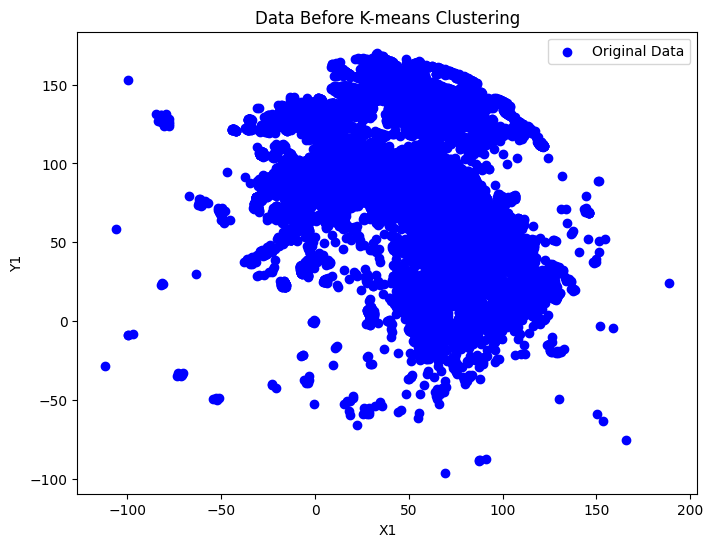

In [ ]:
# Createinga scatter plot of the original data
import matplotlib.pyplot as plt
plt.figure(figsize=(8, 6))
plt.scatter(X[:, 0], X[:, 1], c='blue', label='Original Data')
plt.xlabel("X1")
plt.ylabel("Y1")
plt.title("Data Before K-means Clustering")
plt.legend()
plt.show()

In [ ]:
# Performig clustering using K-means algorithm
kmeans = KMeans(n_clusters=5)  # It Replace 5 with the desired number of clusters
kmeans.fit(X)

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


KMeans(n_clusters=5)

In [ ]:
# Get the cluster labels
cluster_labels = kmeans.labels_

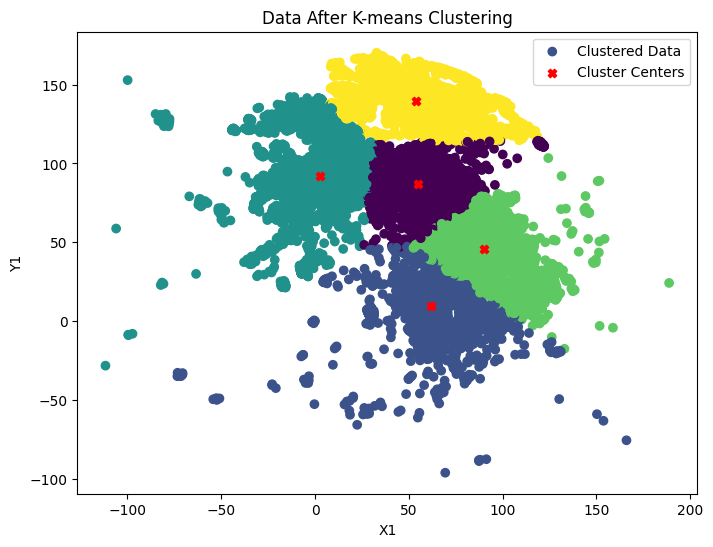

In [ ]:
# Creating a scatter plot of the clustered data
plt.figure(figsize=(8, 6))
plt.scatter(X[:, 0], X[:, 1], c=cluster_labels, cmap='viridis', label='Clustered Data')
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], c='red', marker='X', label='Cluster Centers')
plt.xlabel("X1")
plt.ylabel("Y1")
plt.title("Data After K-means Clustering")
plt.legend()
plt.show()